In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X,y = make_moons(100, noise =0.25, random_state=2)

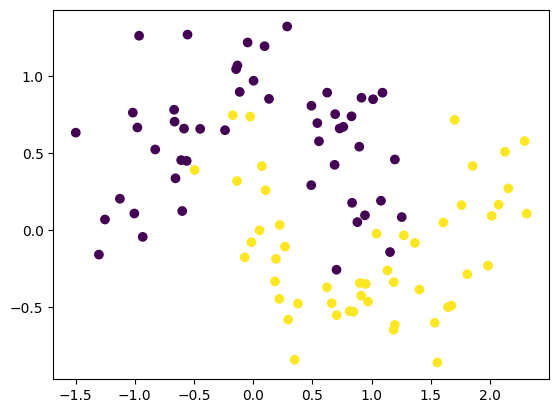

In [5]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.show()

In [6]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
adam = Adam(learning_rate=0.01)
model1.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])
record1 = model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 24s 2ms/step


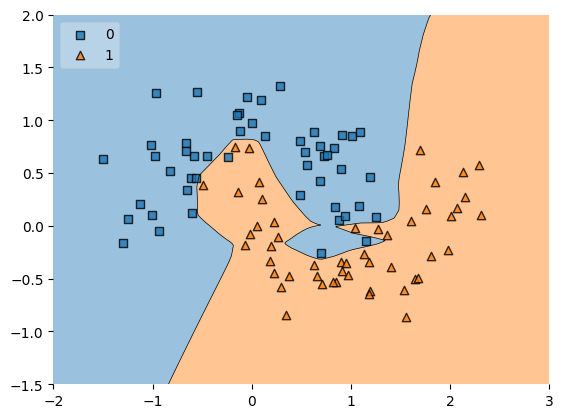

In [9]:
plot_decision_regions(X,y.astype("int"),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

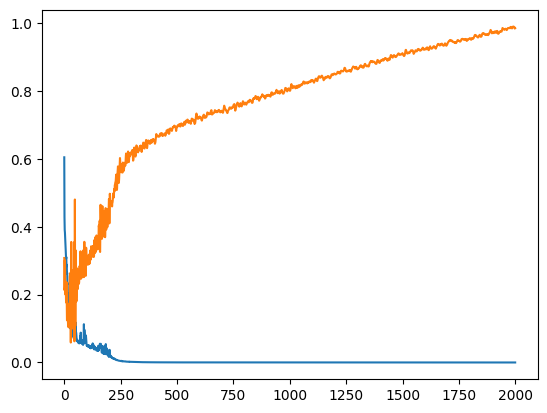

In [10]:
plt.plot(record1.history["loss"])
plt.plot(record1.history["val_loss"])

**Applying Regularization**

In [13]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)))
model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation="sigmoid"))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
adam = Adam(learning_rate=0.01)
model2.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

record2= model2.fit(X,y,epochs=2000,validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 15s 2ms/step


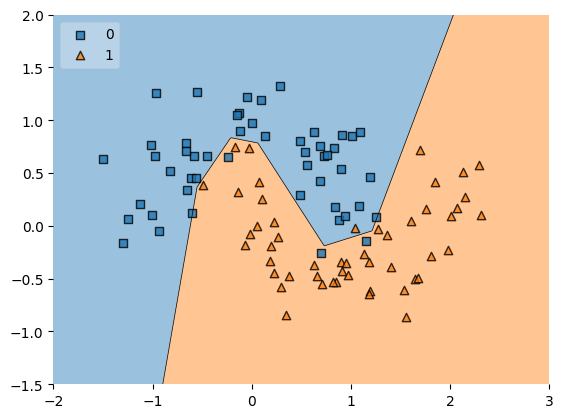

In [16]:
plot_decision_regions(X,y.astype("int"),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

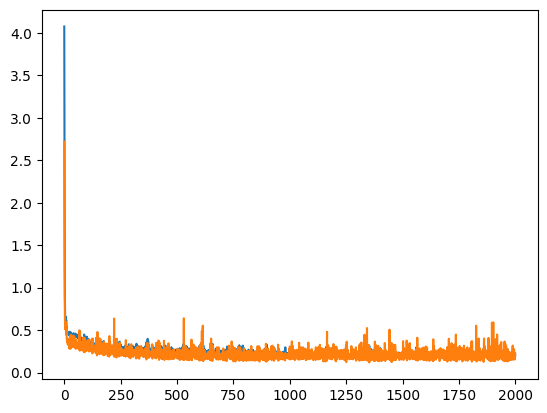

In [17]:
plt.plot(record2.history["loss"])
plt.plot(record2.history["val_loss"])